# Decision Tree / Classification Tree

## Training and Visualizing a Decision Tree

In [14]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,export_graphviz,plot_tree
import matplotlib.pyplot as plt

In [3]:
iris=load_iris()
x=iris.data[:,2:]
y=iris.target

In [9]:
tree_clf=DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x,y)

DecisionTreeClassifier(max_depth=2)

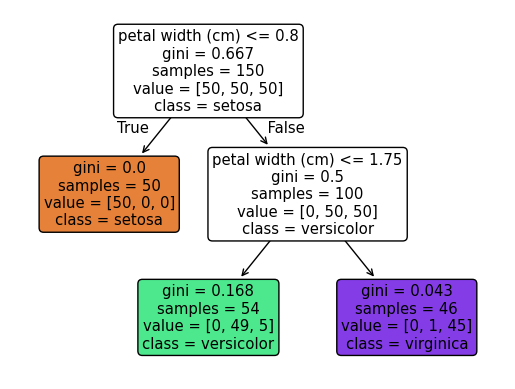

In [15]:
plot_tree(tree_clf,
                feature_names=iris.feature_names[2:],
                class_names=iris.target_names,
                rounded=True,
                filled=True,
               )
plt.show()

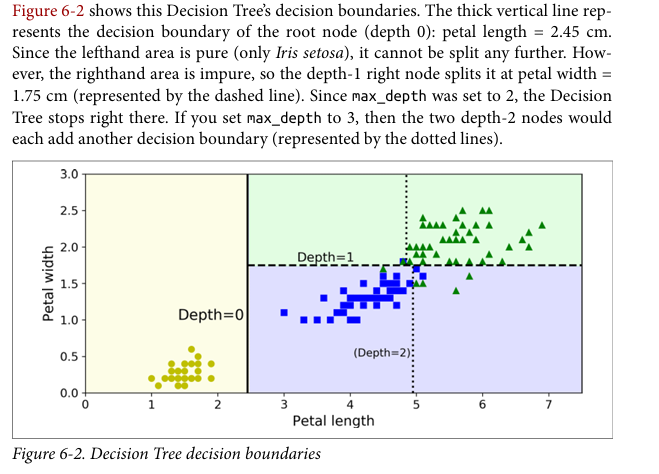

## Estimating Class Probabilities
### A Decision Tree can also estimate the probability that an instance belongs to a particular class k. First it traverses the tree to find the leaf node for this instance, and then itreturns the ratio of training instances of class k in this node.
### For example, suppose you have found a flower whose petals are 5 cm long and 1.5 cm wide.  

In [16]:
tree_clf.predict_proba([[5,2.5]])

array([[0.        , 0.02173913, 0.97826087]])

#### It show that the prob of depth 1 is 0% for depth 2 is 2.17 % and for depth 3 is 97 % so it means that the arg array that we passed is classified as depth 2 right leaf

In [18]:
tree_clf.predict([[5,2.5]])

array([2])

#### 2 -> right depth 2 leaf node

### Computation Complexity
 The training algorithm compares all features (or less if max_features is set) on all
 samples at each node. Comparing all features on all samples at each node results in a
 training complexity of O(n × m log2
 (m)). For small training sets (less than a few thou
sand instances), Scikit-Learn can speed up training by presorting the data (set pre
 sort=True), but doing that slows down training considerably for larger training sets.

# Gini Impurity or Entropy ?
####  So, should you use Gini impurity or entropy? The truth is, most of the time it does not make a big difference: they lead to similar trees. Gini impurity is slightly faster to compute, so it is a good default. However, when they differ, Gini impurity tends to isolate the most frequent class in its own branch of the tree, while entropy tends to produce slightly more balanced trees.

## Hyperparameter Regularization

####  To avoid overfitting the training data, you need to restrict the Decision Tree’s freedom during training. As you know by now, this is called regularization. The regularization hyperparameters depend on the algorithm used, but generally you can at least restrict the maximum depth of the Decision Tree. In Scikit-Learn, this is controlled by the max_depth hyperparameter (the default value is None, which means unlimited). Reducing max_depth will regularize the model and thus reduce the risk of overfitting

 The DecisionTreeClassifier class has a few other parameters that similarly restrict the shape of the Decision Tree: min_samples_split (the minimum number of sam ples a node must have before it can be split), min_samples_leaf (the minimum num ber of samples a leaf node must have), min_weight_fraction_leaf (same as min_samples_leaf but expressed as a fraction of the total number of weighted instances), max_leaf_nodes (the maximum number of leaf nodes), and max_features (the maximum number of features that are evaluated for splitting at each node). Increasing min_* hyperparameters or reducing max_* hyperparameters will regularize the model